In [2]:
import pandas as pd
import tensorflow_io as tfio
from tqdm import tqdm

In [5]:
tracks = pd.read_csv('./data/processed_genres.csv')
shapes = []
for idx, track in tqdm(tracks.iterrows()):    
    fpath = './data/fma_medium' + track['fpath']
    audio = tfio.audio.AudioIOTensor(fpath)
    shape = audio.shape.numpy()[0]
    shapes.append(shape)

0it [00:00, ?it/s]

24945it [02:47, 149.07it/s]


In [8]:
print(set(shapes))

{0, 1323119, 72047, 1322543, 1321967, 278255, 23663, 290927, 68591, 1206767}


In [9]:
for num in set(shapes):
    print(f"{num}: {shapes.count(num)}")

0: 15
1323119: 10455
72047: 1
1322543: 1090
1321967: 13379
278255: 1
23663: 1
290927: 1
68591: 1
1206767: 1


In [14]:
for idx, shape in enumerate(shapes):
    if shape < 132300:
        print(f"{tracks.loc[idx, 'fpath']}: {tracks.loc[idx, 'parent_genre_title']}")

\001\001486.mp3: Electronic
\005\005574.mp3: Rock
\065\065753.mp3: Electronic
\080\080391.mp3: Instrumental
\098\098558.mp3: Hip-Hop
\098\098559.mp3: Hip-Hop
\098\098560.mp3: Hip-Hop
\098\098565.mp3: Hip-Hop
\098\098567.mp3: Hip-Hop
\098\098569.mp3: Hip-Hop
\098\098571.mp3: Hip-Hop
\099\099134.mp3: Electronic
\105\105247.mp3: Rock
\108\108925.mp3: Rock
\126\126981.mp3: Folk
\127\127336.mp3: Rock
\133\133297.mp3: Experimental
\143\143992.mp3: Rock


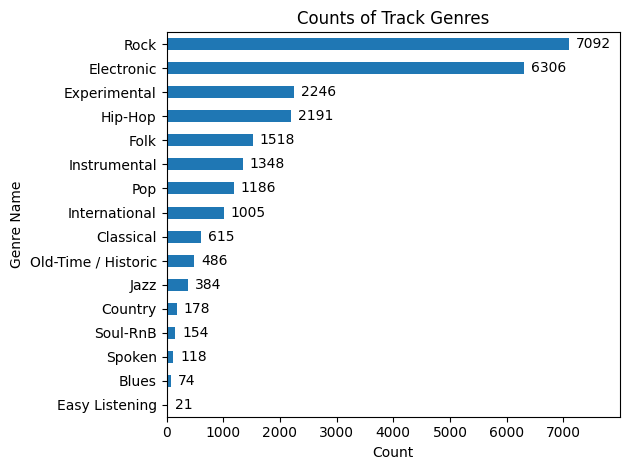

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
tracks = pd.read_csv('./data/processed_genres_mel.csv')
ax = tracks.parent_genre_title.value_counts().sort_values().plot(kind='barh')
plt.title('Counts of Track Genres')
plt.xlabel('Count')
plt.ylabel('Genre Name')
# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.xlim(0, 7999)
plt.tight_layout()
plt.savefig('./visualizations/genres_count.png')

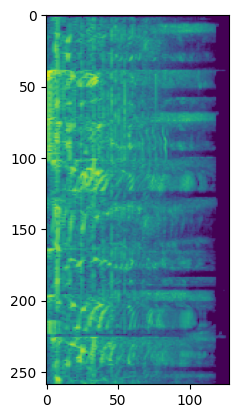

In [6]:
import numpy as np
fpath = tracks['fpath'][0]
fpath = './data/fma_medium' + fpath
spec = np.load(fpath, allow_pickle=True)
plt.imshow(spec[:259])

In [38]:
import visualkeras
import json
import tensorflow as tf
import os
training_dir_list = os.listdir('./training/')
training_dir_list.sort()
load_file = './training/' + training_dir_list[-1] + '/model.json'

f = open(load_file, "r")
config = f.read()
model = tf.keras.models.model_from_json(config)
f.close()


model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, dropout=0.2, recurrent_dropout=0.2, input_shape=(259, 128,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(128, activation="relu"),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(64, activation="relu"),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(32, activation="relu"),  
    tf.keras.layers.Dense(16)
])

model.summary()
#visualkeras.layered_view(model, legend=True)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 300)               514800    
                                                                 
 dropout_46 (Dropout)        (None, 300)               0         
                                                                 
 dense_60 (Dense)            (None, 128)               38528     
                                                                 
 dropout_47 (Dropout)        (None, 128)               0         
                                                                 
 dense_61 (Dense)            (None, 16)                2064      
                                                                 
Total params: 555,392
Trainable params: 555,392
Non-trainable params: 0
_________________________________________________________________
